In [1]:
# Machine learning classification libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
 
# For data manipulation
import pandas as pd
import numpy as np
 
# To plot
import matplotlib.pyplot as plt
import seaborn
 
# To fetch data
import pandas_datareader.data as web

In [2]:
import stockstats as ss

In [3]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text #change to 0 to get company names instead of tickers
        tickers.append(ticker)
        
    #with open("sp500tickers.pickle","wb") as f:
        #pickle.dump(tickers,f)
        
    return sorted(tickers)

sp500 = save_sp500_tickers()

c:\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


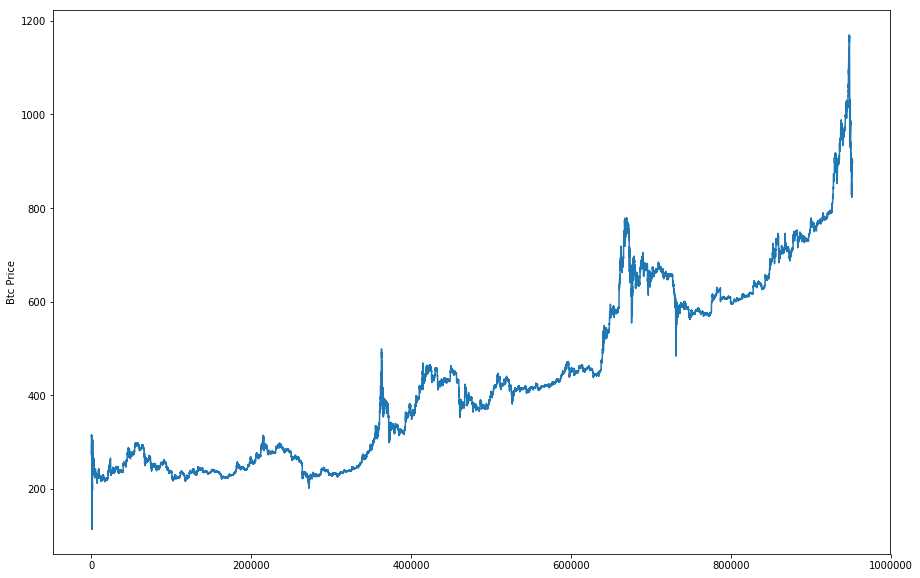

<class 'pandas.core.frame.DataFrame'>


In [4]:
#Df = pdr.get_data_fred('SPY', start="2012-01-01", end="2017-10-01")
#Df = web.DataReader('AAPL', 'iex', start="2014-01-01", end="2019-03-01")
#Df = Df.dropna()

Df = pd.read_csv("../../Data/coinbase_minutely.csv") # loads data
Df = Df.iloc[::15, :].drop(['change'], axis=1) # slices every 15-min of data and removes now incorrect change
Df['change'] = Df['close'].pct_change().shift(-1) # recalculates change
Df = ss.StockDataFrame.retype(Df) #coerces df into StockDataFrame
Df["rsi_6"]
Df['macd']
Df = pd.DataFrame(Df)
Df = Df.dropna()

#print(Df.head())
Df.close.plot(figsize=(15,10))
plt.ylabel("Btc Price")
plt.show()
print(type(Df))

In [5]:
y = np.where(Df['close'].shift(-1) > Df['close'],1,-1)
print(y)
print(type(y))

[ 1 -1 -1 ...  1 -1 -1]
<class 'numpy.ndarray'>


In [6]:
Df['open-close'] = Df.open - Df.close
Df['high-low'] = Df.high - Df.low
X = Df[['open-close','high-low', 'rs_6', 'rsi_6', 'macd', 'macds','macdh']]

In [7]:
split_percentage = 0.8
split = int(split_percentage*len(Df))
 
# Train data set
X_train = X[:split]
y_train = y[:split]
print(X_train.shape, y_train.shape)
 
# Test data set
X_test = X[split:]
y_test = y[split:]
print(X_test.shape, y_test.shape)

(50766, 7) (50766,)
(12692, 7) (12692,)


In [8]:
cls = SVC(verbose = 1)

In [9]:
cls.fit(X_train, y_train)

C:\Users\ngancitano\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1)

In [10]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 55.58%
Test Accuracy: 53.28%


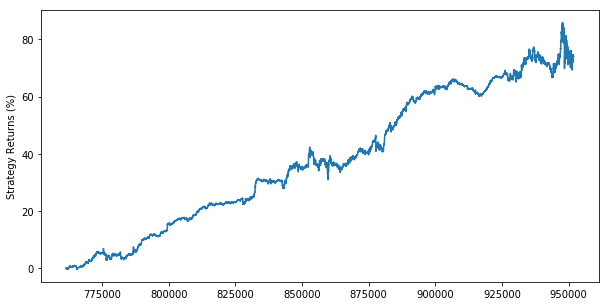

In [11]:
Df['Predicted_Signal'] = cls.predict(X)
 
# Calculate log returns
Df['Return'] = np.log(Df.close.shift(-1) / Df.close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

In [12]:
Df['Predicted_Signal'] = cls.predict(X)
 
# Calculate log returns
Df['Return'] = np.log(Df.close.shift(-1) / Df.close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

print(Df.Strategy_Return.iloc[split:].cumsum().iloc[-2])
print(Df.Return.iloc[split:].cumsum().iloc[-2])

74.07783534678805
43.786574776824025


In [45]:
btc = pd.read_csv("../../Data/coinbase_minutely.csv") # loads data
btc = btc.iloc[::15, :].drop(['change'], axis=1) # slices every 15-min of data and removes now incorrect change
btc['change'] = btc['close'].pct_change().shift(-1) # recalculates change
btc = ss.StockDataFrame.retype(btc) #coerces df into StockDataFrame
btc['macd'] # calculate MACD indicator for the entire "btc" df and automatically appends to new column
btc['volume_delta']
btc['open_-1_r']
btc['cr']
btc['cr-ma1']
btc['cr-ma2']
btc['cr-ma3']
btc["rsi_6"]
btc["rsi_12"]
btc["wr_10"]
btc["cci"]
btc['tr']
btc['atr']
btc['dma']
btc['pdi']
btc['mdi']
btc['dx']
btc['adx']
btc['adxr']
btc['trix']
btc['trix_9_sma']
btc['vr']
btc = pd.DataFrame(btc)
btc = btc.dropna()

#btc.to_csv("btc_simple_testing.csv")

y = np.where(btc['close'].shift(-1) > btc['close'],1,-1)
print(y)
print(type(y))

btc['open-close'] = btc.open - btc.close
btc['high-low'] = btc.high - btc.low
X = btc[['open-close','high-low', 'close_26_ema','macd','macds','macdh','volume_delta','open_-1_r','middle','cr','cr-ma1','cr-ma2','cr-ma3','close_-1_s','close_-1_d','rs_6','rsi_6','rs_12','rsi_12','wr_10','middle_14_sma','cci','tr','atr','close_10_sma','close_50_sma','dma','high_delta','um','low_delta','dm','pdm','pdm_14_ema','pdm_14','atr_14','pdi_14','pdi','mdm','mdm_14_ema','mdm_14','mdi_14','mdi','dx_14','dx','dx_6_ema','adx','adx_6_ema','adxr','trix','trix_9_sma','vr']]

[-1  1  1 ...  1 -1 -1]
<class 'numpy.ndarray'>


In [46]:
split_percentage = 0.8
split = int(split_percentage*len(Df))
 
# Train data set
X_train = X[:split]
y_train = y[:split]
print(X_train.shape, y_train.shape)
 
# Test data set
X_test = X[split:]
y_test = y[split:]
print(X_test.shape, y_test.shape)

(50766, 51) (50766,)
(12683, 51) (12683,)


In [47]:
cls = SVC(verbose = 1)

In [48]:
cls.fit(X_train, y_train)

C:\Users\ngancitano\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1)

In [ ]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 52.58%


In [ ]:
btc['Predicted_Signal'] = cls.predict(X)
 
# Calculate log returns
btc['Return'] = np.log(btc.close.shift(-1) / btc.close)*100
btc['Strategy_Return'] = btc.Return * btc.Predicted_Signal
btc.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

In [62]:
# all-in-one SVC predictor on entirety of SP500

accuracy_results = {}
returns = {}

for ticker in sp500:
    try:
    #download current ticker data
        Df = web.DataReader(ticker, 'iex', start="2014-01-01", end="2019-03-01")
        Df = Df.dropna()
        #print(Df.head())
        #Df.close.plot(figsize=(15,10))
        #plt.ylabel("AAPL Price")
        #plt.show()

        # create numpy array containing +1/-1 depending on yesterday's price change
        y = np.where(Df['close'].shift(-1) > Df['close'],1,-1)

        # create new "X" dataframe containing features
        Df['open-close'] = Df.open - Df.close
        Df['high-low'] = Df.high - Df.low
        X = Df[['open-close','high-low']]

        # split data into training / test
        split_percentage = 0.8
        split = int(split_percentage*len(Df))
        # Train data set
        X_train = X[:split]
        y_train = y[:split]
        # Test data set
        X_test = X[split:]
        y_test = y[split:]

        # train
        cls = SVC().fit(X_train, y_train)

        # accuracies
        accuracy_train = accuracy_score(y_train, cls.predict(X_train))
        accuracy_test = accuracy_score(y_test, cls.predict(X_test))
        print("\n", ticker, " results:")
        print('Train Accuracy:{: .2f}%'.format(accuracy_train*100))
        print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))
        # append to accuracy_results dict
        accuracy_results[ticker] = (accuracy_train*100, accuracy_test*100)
        
        # calculate returns during testing only
        Df['Predicted_Signal'] = cls.predict(X)
        # Calculate log returns
        Df['Return'] = np.log(Df.close.shift(-1) / Df.close)*100
        Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
        print(Df.Strategy_Return.iloc[split:].cumsum().iloc[-2])
        returns[ticker] = [Df.Return.iloc[split:].cumsum().iloc[-2], Df.Strategy_Return.iloc[split:].cumsum().iloc[-2]]
        
    except:
        print(ticker, "FAILED!!!")
        accuracy_results[ticker] = (0,0)
        
df_returns = pd.DataFrame.from_dict(returns, columns=['Hold Return', 'Strategy Return'], orient='index')
df_returns.to_csv("simple_testing_returns.csv")

C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 A  results:
Train Accuracy: 55.07%
Test Accuracy: 52.80%
4.33477386613738


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AAL  results:
Train Accuracy: 52.96%
Test Accuracy: 52.80%
-7.932001245305756


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AAP  results:
Train Accuracy: 58.38%
Test Accuracy: 47.60%
10.008503295330478


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AAPL  results:
Train Accuracy: 54.26%
Test Accuracy: 48.00%
-34.01113328115639


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ABBV  results:
Train Accuracy: 55.57%
Test Accuracy: 45.60%
-66.79993756060546


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ABC  results:
Train Accuracy: 54.86%
Test Accuracy: 53.60%
-9.109921378557306


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ABMD  results:
Train Accuracy: 58.88%
Test Accuracy: 46.40%
-31.27843605949261


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ABT  results:
Train Accuracy: 54.66%
Test Accuracy: 55.20%
8.521426542616219


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ACN  results:
Train Accuracy: 57.87%
Test Accuracy: 55.60%
-5.294871920566047


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ADBE  results:
Train Accuracy: 56.87%
Test Accuracy: 49.20%
0.4285314636656741


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ADI  results:
Train Accuracy: 53.56%
Test Accuracy: 52.40%
45.808075404264116


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ADM  results:
Train Accuracy: 52.96%
Test Accuracy: 50.80%
-1.8358212359747847


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ADP  results:
Train Accuracy: 54.86%
Test Accuracy: 57.60%
61.67412472975495


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ADS  results:
Train Accuracy: 59.08%
Test Accuracy: 44.40%
-36.37026628732646


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ADSK  results:
Train Accuracy: 55.67%
Test Accuracy: 52.40%
50.00277458377524


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AEE  results:
Train Accuracy: 53.56%
Test Accuracy: 56.80%
21.66995648586309


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AEP  results:
Train Accuracy: 55.97%
Test Accuracy: 48.80%
-11.583104027096152


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AES  results:
Train Accuracy: 52.46%
Test Accuracy: 46.80%
-11.943573243947322


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AFL  results:
Train Accuracy: 55.27%
Test Accuracy: 52.40%
13.077045549503087


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AGN  results:
Train Accuracy: 61.18%
Test Accuracy: 48.80%
4.074943409765216


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AIG  results:
Train Accuracy: 53.36%
Test Accuracy: 48.80%
-21.42085132228128


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AIV  results:
Train Accuracy: 53.26%
Test Accuracy: 53.20%
8.061656096259618


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AIZ  results:
Train Accuracy: 54.56%
Test Accuracy: 50.40%
1.7684633670527503


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AJG  results:
Train Accuracy: 54.86%
Test Accuracy: 53.60%
16.487992866612753


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AKAM  results:
Train Accuracy: 54.36%
Test Accuracy: 51.60%
-4.452305782242708


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ALB  results:
Train Accuracy: 55.47%
Test Accuracy: 49.60%
-28.502925127486584


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ALGN  results:
Train Accuracy: 59.78%
Test Accuracy: 52.80%
-37.992587508619955


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ALK  results:
Train Accuracy: 55.37%
Test Accuracy: 54.80%
19.1415698129168


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ALL  results:
Train Accuracy: 56.17%
Test Accuracy: 57.20%
0.5260885743593817


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ALLE  results:
Train Accuracy: 52.36%
Test Accuracy: 54.00%
10.389359829513161


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ALXN  results:
Train Accuracy: 59.28%
Test Accuracy: 49.20%
11.084451818606153


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMAT  results:
Train Accuracy: 53.66%
Test Accuracy: 50.00%
-38.25506940140913


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMD  results:
Train Accuracy: 51.86%
Test Accuracy: 49.20%
60.69066324344394


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AME  results:
Train Accuracy: 56.07%
Test Accuracy: 52.40%
15.27532911434184


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMG  results:
Train Accuracy: 58.07%
Test Accuracy: 50.00%
-9.170534126217248


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMGN  results:
Train Accuracy: 56.77%
Test Accuracy: 56.40%
37.13672385542104


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMP  results:
Train Accuracy: 55.27%
Test Accuracy: 47.60%
-35.41273443742301


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMT  results:
Train Accuracy: 55.17%
Test Accuracy: 52.00%
-6.518331492888464


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AMZN  results:
Train Accuracy: 68.41%
Test Accuracy: 55.60%
22.854360301775888


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ANET  results:
Train Accuracy: 58.66%
Test Accuracy: 52.30%
-28.54960453201561


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ANSS  results:
Train Accuracy: 57.97%
Test Accuracy: 51.20%
-5.8854105021596865


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ANTM  results:
Train Accuracy: 58.68%
Test Accuracy: 52.80%
27.32718877914951


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AON  results:
Train Accuracy: 55.87%
Test Accuracy: 59.60%
11.806472143739143


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AOS  results:
Train Accuracy: 55.87%
Test Accuracy: 51.20%
17.52640250111832


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 APA  results:
Train Accuracy: 53.16%
Test Accuracy: 44.00%
6.901308972655229


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 APC  results:
Train Accuracy: 54.96%
Test Accuracy: 55.20%
44.30534909484023


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 APD  results:
Train Accuracy: 56.37%
Test Accuracy: 48.80%
-3.367999055976899


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 APH  results:
Train Accuracy: 55.97%
Test Accuracy: 49.60%
-13.131402150792626


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 APTV  results:
Train Accuracy: 61.69%
Test Accuracy: 50.00%
4.006383446012828


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ARE  results:
Train Accuracy: 55.17%
Test Accuracy: 52.80%
15.164872016397764


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ARNC  results:
Train Accuracy: 50.95%
Test Accuracy: 53.20%
-36.017847709144064


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ATO  results:
Train Accuracy: 56.27%
Test Accuracy: 53.60%
-6.103747275831521


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ATVI  results:
Train Accuracy: 55.57%
Test Accuracy: 54.40%
35.86689494998903


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AVB  results:
Train Accuracy: 54.56%
Test Accuracy: 56.00%
22.006419182113206


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AVGO  results:
Train Accuracy: 57.87%
Test Accuracy: 54.00%
-5.099452359373785


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AVY  results:
Train Accuracy: 55.17%
Test Accuracy: 50.40%
14.064512196131695


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AWK  results:
Train Accuracy: 55.57%
Test Accuracy: 56.00%
18.254373138650543


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AXP  results:
Train Accuracy: 52.76%
Test Accuracy: 55.20%
19.106688052422204


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 AZO  results:
Train Accuracy: 70.21%
Test Accuracy: 49.20%
40.91980637266784


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BA  results:
Train Accuracy: 57.67%
Test Accuracy: 46.80%
3.912803930518883


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BAC  results:
Train Accuracy: 53.16%
Test Accuracy: 51.60%
-20.52661698992064


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BAX  results:
Train Accuracy: 52.96%
Test Accuracy: 55.20%
17.118639098710354


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BBT  results:
Train Accuracy: 54.66%
Test Accuracy: 44.80%
-25.97588968280446


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BBY  results:
Train Accuracy: 54.26%
Test Accuracy: 52.80%
-5.660566172115848


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BDX  results:
Train Accuracy: 58.17%
Test Accuracy: 51.20%
-4.138186493592327


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BEN  results:
Train Accuracy: 53.06%
Test Accuracy: 51.60%
6.821824907598587


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BF.B  results:
Train Accuracy: 53.86%
Test Accuracy: 55.60%
22.878077883496086


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BHF  results:
Train Accuracy: 52.76%
Test Accuracy: 46.34%
-21.824649763340645


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BHGE  results:
Train Accuracy: 54.19%
Test Accuracy: 44.05%
9.813012363830312


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BIIB  results:
Train Accuracy: 64.39%
Test Accuracy: 52.40%
30.756739485432153


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BK  results:
Train Accuracy: 53.96%
Test Accuracy: 50.00%
-4.721457586968904


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BKNG  results:
Train Accuracy: 80.74%
Test Accuracy: 55.20%
-15.030883165380837


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BLK  results:
Train Accuracy: 59.28%
Test Accuracy: 47.60%
0.17166426108301458


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BLL  results:
Train Accuracy: 52.56%
Test Accuracy: 53.60%
28.208943109246473


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BMY  results:
Train Accuracy: 55.27%
Test Accuracy: 51.60%
15.58432132617629


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BR  results:
Train Accuracy: 56.67%
Test Accuracy: 49.20%
-24.11762489543903


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BRK.B  results:
Train Accuracy: 56.07%
Test Accuracy: 42.80%
-24.140676938880503


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BSX  results:
Train Accuracy: 53.26%
Test Accuracy: 47.60%
-11.567246686018812


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BWA  results:
Train Accuracy: 53.66%
Test Accuracy: 50.00%
-16.953609583434393


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 BXP  results:
Train Accuracy: 54.86%
Test Accuracy: 48.00%
11.044355362056747


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 C  results:
Train Accuracy: 53.16%
Test Accuracy: 51.60%
-2.3566188349809893


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CAG  results:
Train Accuracy: 53.56%
Test Accuracy: 48.80%
-71.08713371340846


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CAH  results:
Train Accuracy: 54.96%
Test Accuracy: 50.80%
-3.0025934415300894


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CAT  results:
Train Accuracy: 55.97%
Test Accuracy: 50.40%
-2.324666352094325


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CB  results:
Train Accuracy: 55.17%
Test Accuracy: 54.00%
15.858827410070546


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CBOE  results:
Train Accuracy: 56.37%
Test Accuracy: 49.20%
-0.5696042521682392


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CBRE  results:
Train Accuracy: 52.96%
Test Accuracy: 50.80%
6.058687338456298


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CBS  results:
Train Accuracy: 53.66%
Test Accuracy: 51.20%
24.99888517250008


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CCI  results:
Train Accuracy: 53.56%
Test Accuracy: 50.00%
20.026725441016282


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CCL  results:
Train Accuracy: 54.06%
Test Accuracy: 56.00%
-6.731686521866218


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CDNS  results:
Train Accuracy: 53.56%
Test Accuracy: 54.40%
33.27764901156652


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CE  results:
Train Accuracy: 54.96%
Test Accuracy: 52.40%
-2.393010711029183


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CELG  results:
Train Accuracy: 57.77%
Test Accuracy: 50.00%
14.812133292713591


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CERN  results:
Train Accuracy: 52.86%
Test Accuracy: 46.00%
-45.10471715814049


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CF  results:
Train Accuracy: 51.05%
Test Accuracy: 57.60%
53.10081374850574


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CFG  results:
Train Accuracy: 53.48%
Test Accuracy: 46.88%
-10.228335361477662


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CHD  results:
Train Accuracy: 53.76%
Test Accuracy: 56.40%
35.12828828836418


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CHRW  results:
Train Accuracy: 55.07%
Test Accuracy: 54.00%
12.477942914494193


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CHTR  results:
Train Accuracy: 62.19%
Test Accuracy: 48.00%
-12.97921988807597


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CI  results:
Train Accuracy: 57.57%
Test Accuracy: 51.60%
55.01778383949039


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CINF  results:
Train Accuracy: 54.46%
Test Accuracy: 48.00%
-4.682452174634354


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CL  results:
Train Accuracy: 54.86%
Test Accuracy: 47.60%
0.2191985333246836


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CLX  results:
Train Accuracy: 56.77%
Test Accuracy: 52.40%
25.634931331867953


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CMA  results:
Train Accuracy: 52.96%
Test Accuracy: 52.40%
-10.808354680689765


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CMCSA  results:
Train Accuracy: 53.26%
Test Accuracy: 48.80%
8.357066272541738


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CME  results:
Train Accuracy: 54.06%
Test Accuracy: 53.60%
-4.099924115657707


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CMG  results:
Train Accuracy: 69.11%
Test Accuracy: 51.20%
61.919762361672426


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CMI  results:
Train Accuracy: 55.87%
Test Accuracy: 52.40%
2.1352716509094263


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CMS  results:
Train Accuracy: 54.66%
Test Accuracy: 55.20%
25.0146822814358


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CNC  results:
Train Accuracy: 55.07%
Test Accuracy: 52.80%
27.61421546584459


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CNP  results:
Train Accuracy: 53.16%
Test Accuracy: 54.40%
14.522696445122909


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 COF  results:
Train Accuracy: 53.76%
Test Accuracy: 49.60%
-7.52730969797497


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 COG  results:
Train Accuracy: 52.86%
Test Accuracy: 49.20%
-0.7815724851092596


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 COO  results:
Train Accuracy: 57.57%
Test Accuracy: 56.40%
26.307710854336996


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 COP  results:
Train Accuracy: 54.26%
Test Accuracy: 50.00%
-4.5284818736006445


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 COST  results:
Train Accuracy: 54.86%
Test Accuracy: 57.60%
19.49427104146773


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 COTY  results:
Train Accuracy: 51.05%
Test Accuracy: 47.20%
-34.06557266393648


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CPB  results:
Train Accuracy: 54.86%
Test Accuracy: 52.40%
-5.017471780797672


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CPRI  results:
Train Accuracy: 54.76%
Test Accuracy: 51.60%
46.64474234228539


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CPRT  results:
Train Accuracy: 52.86%
Test Accuracy: 56.80%
20.65861787935882


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CRM  results:
Train Accuracy: 54.96%
Test Accuracy: 56.80%
57.98047329167505


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CSCO  results:
Train Accuracy: 53.16%
Test Accuracy: 52.80%
17.411721863049976


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CSX  results:
Train Accuracy: 54.36%
Test Accuracy: 51.20%
-28.583190616986887


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CTAS  results:
Train Accuracy: 56.67%
Test Accuracy: 54.00%
22.39008981049805


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CTL  results:
Train Accuracy: 51.35%
Test Accuracy: 46.80%
-0.2839105661536798


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CTSH  results:
Train Accuracy: 54.76%
Test Accuracy: 52.00%
25.210519111656126


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CTXS  results:
Train Accuracy: 55.47%
Test Accuracy: 48.80%
-6.745187687138936


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CVS  results:
Train Accuracy: 54.06%
Test Accuracy: 51.60%
-3.633956547476874


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CVX  results:
Train Accuracy: 51.96%
Test Accuracy: 48.40%
-12.421362607296945


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 CXO  results:
Train Accuracy: 57.57%
Test Accuracy: 46.40%
-44.77300471175526


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 D  results:
Train Accuracy: 53.66%
Test Accuracy: 54.40%
20.370514142189165


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DAL  results:
Train Accuracy: 52.46%
Test Accuracy: 53.20%
-6.813384249645631


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DE  results:
Train Accuracy: 54.36%
Test Accuracy: 49.20%
-5.105342923462615


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DFS  results:
Train Accuracy: 51.65%
Test Accuracy: 52.80%
-8.61544011271411


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DG  results:
Train Accuracy: 53.66%
Test Accuracy: 50.40%
15.917064174186601


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DGX  results:
Train Accuracy: 54.26%
Test Accuracy: 53.20%
25.409309591946258


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DHI  results:
Train Accuracy: 52.06%
Test Accuracy: 49.20%
-7.115419239239525


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DHR  results:
Train Accuracy: 54.77%
Test Accuracy: 55.06%
6.877487770380033


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DIS  results:
Train Accuracy: 53.96%
Test Accuracy: 54.00%
7.957654200680418


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DISCA  results:
Train Accuracy: 53.46%
Test Accuracy: 54.40%
26.55421952691812


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DISCK  results:
Train Accuracy: 53.16%
Test Accuracy: 54.80%
21.398813632335234


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DISH  results:
Train Accuracy: 54.36%
Test Accuracy: 52.80%
-4.469748697759772


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DLR  results:
Train Accuracy: 57.07%
Test Accuracy: 55.20%
-3.2083833819402567


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DLTR  results:
Train Accuracy: 54.66%
Test Accuracy: 53.20%
-13.488685354951729


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DOV  results:
Train Accuracy: 53.36%
Test Accuracy: 49.20%
-9.102805016040172


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DRE  results:
Train Accuracy: 52.76%
Test Accuracy: 53.60%
1.4634829342942217


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DRI  results:
Train Accuracy: 55.17%
Test Accuracy: 51.60%
19.54266697598334


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DTE  results:
Train Accuracy: 56.97%
Test Accuracy: 52.80%
6.577138628851003


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DUK  results:
Train Accuracy: 54.06%
Test Accuracy: 54.00%
15.194957866065952


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DVA  results:
Train Accuracy: 53.56%
Test Accuracy: 47.20%
-23.53734558429847


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DVN  results:
Train Accuracy: 55.07%
Test Accuracy: 51.60%
-2.720636168201904


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DWDP  results:
Train Accuracy: 57.33%
Test Accuracy: 50.67%
8.394169835046398


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 DXC  results:
Train Accuracy: 56.51%
Test Accuracy: 57.73%
-2.5541033978438508


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EA  results:
Train Accuracy: 57.07%
Test Accuracy: 52.80%
-28.673874718151747


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EBAY  results:
Train Accuracy: 51.86%
Test Accuracy: 51.60%
-14.154371941269432


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ECL  results:
Train Accuracy: 53.76%
Test Accuracy: 54.40%
37.33483448448944


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ED  results:
Train Accuracy: 55.97%
Test Accuracy: 54.40%
-4.8367995444633065


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EFX  results:
Train Accuracy: 55.17%
Test Accuracy: 54.40%
33.41231966450386


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EIX  results:
Train Accuracy: 54.16%
Test Accuracy: 53.20%
20.48367900017639


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EL  results:
Train Accuracy: 53.96%
Test Accuracy: 52.80%
0.5307104311974394


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EMN  results:
Train Accuracy: 55.07%
Test Accuracy: 47.60%
-36.597744877460535


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EMR  results:
Train Accuracy: 52.66%
Test Accuracy: 52.80%
2.140611103438219


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EOG  results:
Train Accuracy: 55.67%
Test Accuracy: 47.60%
-8.481865536133856


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EQIX  results:
Train Accuracy: 63.79%
Test Accuracy: 52.00%
18.70554034782582


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EQR  results:
Train Accuracy: 54.06%
Test Accuracy: 58.40%
32.25847281347866


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ES  results:
Train Accuracy: 55.06%
Test Accuracy: 56.05%
28.708218051228382


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ESS  results:
Train Accuracy: 57.27%
Test Accuracy: 47.60%
-30.722017567784544


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ETFC  results:
Train Accuracy: 52.36%
Test Accuracy: 51.60%
-9.061665529748273


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ETN  results:
Train Accuracy: 53.96%
Test Accuracy: 47.20%
-17.89151407730422


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ETR  results:
Train Accuracy: 55.97%
Test Accuracy: 52.00%
-3.9748386126491586


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EVRG  results:
Train Accuracy: 56.08%
Test Accuracy: 60.53%
-0.8046767265834791


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EW  results:
Train Accuracy: 57.27%
Test Accuracy: 49.60%
-25.135150525303327


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EXC  results:
Train Accuracy: 53.16%
Test Accuracy: 56.00%
27.153678919895505


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EXPD  results:
Train Accuracy: 53.56%
Test Accuracy: 53.20%
16.552356598450743


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EXPE  results:
Train Accuracy: 55.97%
Test Accuracy: 47.60%
3.158343619287068


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 EXR  results:
Train Accuracy: 55.07%
Test Accuracy: 52.00%
-0.9535488602602398


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 F  results:
Train Accuracy: 50.55%
Test Accuracy: 51.20%
12.298248960247523


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FANG  results:
Train Accuracy: 54.56%
Test Accuracy: 55.20%
14.26423002238537


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FAST  results:
Train Accuracy: 52.06%
Test Accuracy: 47.20%
5.210860619437669


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FB  results:
Train Accuracy: 56.27%
Test Accuracy: 50.40%
-7.924766886338691


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FBHS  results:
Train Accuracy: 55.37%
Test Accuracy: 50.00%
-15.64784584825118


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FCX  results:
Train Accuracy: 51.35%
Test Accuracy: 50.40%
33.2206296165358


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FDX  results:
Train Accuracy: 54.06%
Test Accuracy: 60.00%
19.76277315405775


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FE  results:
Train Accuracy: 53.06%
Test Accuracy: 54.00%
2.2956374104984603


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FFIV  results:
Train Accuracy: 57.97%
Test Accuracy: 53.60%
3.5735550177999125


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FIS  results:
Train Accuracy: 55.77%
Test Accuracy: 52.40%
15.499485099866623


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FISV  results:
Train Accuracy: 55.27%
Test Accuracy: 54.40%
17.576824169631248


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FITB  results:
Train Accuracy: 52.66%
Test Accuracy: 48.40%
-16.35329237555476


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FL  results:
Train Accuracy: 53.66%
Test Accuracy: 56.40%
24.17653940060598


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FLIR  results:
Train Accuracy: 52.66%
Test Accuracy: 48.00%
-9.056718178695784


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FLR  results:
Train Accuracy: 53.86%
Test Accuracy: 51.60%
27.71960843280986


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FLS  results:
Train Accuracy: 53.16%
Test Accuracy: 48.80%
-8.618355838817719


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FLT  results:
Train Accuracy: 61.48%
Test Accuracy: 50.00%
4.887688548998139


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FMC  results:
Train Accuracy: 55.67%
Test Accuracy: 45.60%
-29.227596157532602
FOX FAILED!!!
FOXA FAILED!!!


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FRC  results:
Train Accuracy: 53.46%
Test Accuracy: 53.20%
31.334846044987742


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FRT  results:
Train Accuracy: 56.07%
Test Accuracy: 49.60%
-14.55171368635613


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FTI  results:
Train Accuracy: 53.06%
Test Accuracy: 48.00%
19.974359154171854


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FTNT  results:
Train Accuracy: 55.57%
Test Accuracy: 49.60%
-19.33193722740802


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 FTV  results:
Train Accuracy: 54.58%
Test Accuracy: 53.73%
-5.810336007077802


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GD  results:
Train Accuracy: 57.27%
Test Accuracy: 46.00%
-43.4994074612412


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GE  results:
Train Accuracy: 51.15%
Test Accuracy: 55.60%
28.007948207966482


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GILD  results:
Train Accuracy: 53.86%
Test Accuracy: 53.60%
-25.306016540592125


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GIS  results:
Train Accuracy: 52.76%
Test Accuracy: 54.40%
-0.8276621797219403


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GLW  results:
Train Accuracy: 53.16%
Test Accuracy: 48.40%
20.540126868136756


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GM  results:
Train Accuracy: 52.76%
Test Accuracy: 50.80%
-6.365896113053683


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GOOG  results:
Train Accuracy: 67.64%
Test Accuracy: 56.63%
27.273024295263532


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GOOGL  results:
Train Accuracy: 67.30%
Test Accuracy: 50.80%
14.5583490530527


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GPC  results:
Train Accuracy: 53.26%
Test Accuracy: 53.20%
7.429379631983688


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GPN  results:
Train Accuracy: 57.07%
Test Accuracy: 51.20%
0.27927327222980924


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GPS  results:
Train Accuracy: 53.46%
Test Accuracy: 49.20%
17.06827075230219


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GRMN  results:
Train Accuracy: 55.37%
Test Accuracy: 52.80%
-19.39690074130668


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GS  results:
Train Accuracy: 57.57%
Test Accuracy: 40.80%
-52.263901044932794


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 GWW  results:
Train Accuracy: 56.97%
Test Accuracy: 54.40%
22.272624294000867


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HAL  results:
Train Accuracy: 51.55%
Test Accuracy: 49.60%
34.36647173177839


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HAS  results:
Train Accuracy: 56.87%
Test Accuracy: 52.40%
-13.171386220180217


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HBAN  results:
Train Accuracy: 52.36%
Test Accuracy: 52.40%
-7.14555777887192


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HBI  results:
Train Accuracy: 52.06%
Test Accuracy: 52.80%
-24.106450950968732


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HCA  results:
Train Accuracy: 53.76%
Test Accuracy: 51.60%
37.91094343979394


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HCP  results:
Train Accuracy: 55.97%
Test Accuracy: 54.00%
24.393880439767358


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HD  results:
Train Accuracy: 54.86%
Test Accuracy: 51.60%
18.502878148745616


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HES  results:
Train Accuracy: 57.67%
Test Accuracy: 50.00%
5.598823920301387


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HFC  results:
Train Accuracy: 53.46%
Test Accuracy: 55.60%
80.10486756721681


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HIG  results:
Train Accuracy: 53.76%
Test Accuracy: 50.40%
-6.4359481831639505


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HII  results:
Train Accuracy: 58.98%
Test Accuracy: 51.20%
-6.560570543690748


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HLT  results:
Train Accuracy: 54.97%
Test Accuracy: 50.46%
18.87626512356884


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HOG  results:
Train Accuracy: 54.26%
Test Accuracy: 51.20%
31.96640336284319


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HOLX  results:
Train Accuracy: 55.57%
Test Accuracy: 52.80%
10.177547011211606


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HON  results:
Train Accuracy: 56.57%
Test Accuracy: 55.20%
30.927139921816046


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HP  results:
Train Accuracy: 55.97%
Test Accuracy: 50.00%
7.464103057191897


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HPE  results:
Train Accuracy: 52.29%
Test Accuracy: 54.71%
12.148284372175176


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HPQ  results:
Train Accuracy: 52.73%
Test Accuracy: 50.59%
-13.887274735581935


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HRB  results:
Train Accuracy: 53.46%
Test Accuracy: 56.00%
-2.871184332431955


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HRL  results:
Train Accuracy: 52.96%
Test Accuracy: 54.80%
22.458817727187476


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HRS  results:
Train Accuracy: 54.56%
Test Accuracy: 52.80%
20.665990545042565


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HSIC  results:
Train Accuracy: 55.67%
Test Accuracy: 48.40%
-14.495280761315337


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HST  results:
Train Accuracy: 51.15%
Test Accuracy: 50.40%
12.09575063010396


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HSY  results:
Train Accuracy: 54.06%
Test Accuracy: 50.40%
-3.761778462090094


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 HUM  results:
Train Accuracy: 59.18%
Test Accuracy: 53.20%
27.601347181634022


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IBM  results:
Train Accuracy: 54.36%
Test Accuracy: 45.20%
-54.85359306686354


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ICE  results:
Train Accuracy: 52.81%
Test Accuracy: 55.60%
34.83944991905314


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IDXX  results:
Train Accuracy: 57.87%
Test Accuracy: 53.20%
-18.29525173524111


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IFF  results:
Train Accuracy: 56.17%
Test Accuracy: 48.80%
-15.89188934860826


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ILMN  results:
Train Accuracy: 58.38%
Test Accuracy: 49.20%
-1.051902050403827


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 INCY  results:
Train Accuracy: 57.37%
Test Accuracy: 46.80%
-0.5192434774025441


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 INFO  results:
Train Accuracy: 51.16%
Test Accuracy: 50.63%
12.221578018798683


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 INTC  results:
Train Accuracy: 53.86%
Test Accuracy: 52.40%
28.99248012464809


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 INTU  results:
Train Accuracy: 57.87%
Test Accuracy: 54.00%
-13.65685232879132


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IP  results:
Train Accuracy: 53.56%
Test Accuracy: 50.00%
17.0965149743818


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IPG  results:
Train Accuracy: 52.86%
Test Accuracy: 55.20%
1.7590031496997955


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IPGP  results:
Train Accuracy: 57.67%
Test Accuracy: 51.20%
-38.140175903467394


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IQV  results:
Train Accuracy: 54.46%
Test Accuracy: 51.60%
5.948982331668796


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IR  results:
Train Accuracy: 53.56%
Test Accuracy: 50.40%
9.611830636134306


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IRM  results:
Train Accuracy: 53.56%
Test Accuracy: 56.00%
3.802772859088707


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ISRG  results:
Train Accuracy: 58.98%
Test Accuracy: 52.00%
-13.119387982450798


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IT  results:
Train Accuracy: 55.97%
Test Accuracy: 58.00%
39.08900613985442


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ITW  results:
Train Accuracy: 56.17%
Test Accuracy: 51.60%
-7.616610962965111


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 IVZ  results:
Train Accuracy: 52.16%
Test Accuracy: 48.40%
-32.51517261436517


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JBHT  results:
Train Accuracy: 53.86%
Test Accuracy: 46.80%
-23.07296589636784


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JCI  results:
Train Accuracy: 55.07%
Test Accuracy: 48.80%
-26.01925519180153


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JEC  results:
Train Accuracy: 54.96%
Test Accuracy: 51.20%
-20.905884176548614


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JEF  results:
Train Accuracy: 52.86%
Test Accuracy: 50.40%
-24.80160248449757


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JKHY  results:
Train Accuracy: 54.36%
Test Accuracy: 58.80%
33.28861179652264


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JNJ  results:
Train Accuracy: 54.36%
Test Accuracy: 56.00%
20.310095990584973


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JNPR  results:
Train Accuracy: 53.46%
Test Accuracy: 55.20%
5.118036581864475


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JPM  results:
Train Accuracy: 54.36%
Test Accuracy: 46.40%
-5.665829866305953


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 JWN  results:
Train Accuracy: 53.46%
Test Accuracy: 49.60%
-19.654809032340513


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 K  results:
Train Accuracy: 54.76%
Test Accuracy: 52.00%
-22.75560480155675


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KEY  results:
Train Accuracy: 52.76%
Test Accuracy: 50.80%
-30.7108612304494


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KEYS  results:
Train Accuracy: 54.90%
Test Accuracy: 55.45%
43.39644360331551


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KHC  results:
Train Accuracy: 55.03%
Test Accuracy: 54.59%
48.28557874232096


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KIM  results:
Train Accuracy: 52.76%
Test Accuracy: 49.60%
20.70660460905454


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KLAC  results:
Train Accuracy: 57.97%
Test Accuracy: 52.80%
-24.147513793123622


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KMB  results:
Train Accuracy: 55.77%
Test Accuracy: 53.20%
28.93813328968112


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KMI  results:
Train Accuracy: 53.16%
Test Accuracy: 44.80%
-24.40288313367072


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KMX  results:
Train Accuracy: 55.07%
Test Accuracy: 46.40%
-24.572228608284277


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KO  results:
Train Accuracy: 52.76%
Test Accuracy: 52.40%
17.69454573138969


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KR  results:
Train Accuracy: 53.16%
Test Accuracy: 54.80%
4.2268745345846295


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KSS  results:
Train Accuracy: 57.07%
Test Accuracy: 54.80%
7.365724502822039


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 KSU  results:
Train Accuracy: 53.76%
Test Accuracy: 52.00%
5.271844732754603


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 L  results:
Train Accuracy: 53.56%
Test Accuracy: 49.60%
21.003778392214564


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LB  results:
Train Accuracy: 53.96%
Test Accuracy: 44.80%
-97.80831450617063


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LEG  results:
Train Accuracy: 53.86%
Test Accuracy: 52.00%
8.042727379470994


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LEN  results:
Train Accuracy: 53.46%
Test Accuracy: 47.20%
-30.609741276692432


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LH  results:
Train Accuracy: 55.47%
Test Accuracy: 49.20%
-4.20552848350339


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LIN  results:
Train Accuracy: 72.31%
Test Accuracy: 52.94%
2.965200510231887


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LKQ  results:
Train Accuracy: 53.16%
Test Accuracy: 48.00%
-33.575307082250816


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LLL  results:
Train Accuracy: 55.87%
Test Accuracy: 46.80%
16.500925855173776


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LLY  results:
Train Accuracy: 55.07%
Test Accuracy: 48.80%
4.991130630293272


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LMT  results:
Train Accuracy: 58.17%
Test Accuracy: 50.00%
-14.745209918434856


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LNC  results:
Train Accuracy: 53.86%
Test Accuracy: 45.60%
-34.825929555860746


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LNT  results:
Train Accuracy: 56.17%
Test Accuracy: 55.20%
24.37037973002504


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LOW  results:
Train Accuracy: 54.96%
Test Accuracy: 51.20%
9.391580386593576


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LRCX  results:
Train Accuracy: 58.88%
Test Accuracy: 48.00%
-17.11741110550465


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LUV  results:
Train Accuracy: 54.86%
Test Accuracy: 48.80%
1.5396115069832157


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LW  results:
Train Accuracy: 56.96%
Test Accuracy: 51.28%
-1.7459512125129368


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 LYB  results:
Train Accuracy: 55.37%
Test Accuracy: 47.20%
-9.014900536618256


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 M  results:
Train Accuracy: 52.36%
Test Accuracy: 52.80%
61.386288220960886


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MA  results:
Train Accuracy: 58.58%
Test Accuracy: 52.40%
7.339498600176765


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MAA  results:
Train Accuracy: 55.17%
Test Accuracy: 56.40%
10.644719348441782


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MAC  results:
Train Accuracy: 54.26%
Test Accuracy: 46.40%
-50.148366505981784


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MAR  results:
Train Accuracy: 55.37%
Test Accuracy: 52.80%
32.2175668325479


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MAS  results:
Train Accuracy: 53.36%
Test Accuracy: 48.80%
-1.5937323487841226


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MAT  results:
Train Accuracy: 52.96%
Test Accuracy: 53.20%
70.53648302287543


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MCD  results:
Train Accuracy: 55.27%
Test Accuracy: 52.80%
19.36802248393319


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MCHP  results:
Train Accuracy: 55.17%
Test Accuracy: 48.00%
-9.58348465965528


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MCK  results:
Train Accuracy: 56.77%
Test Accuracy: 48.80%
-5.550200313415314


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MCO  results:
Train Accuracy: 54.86%
Test Accuracy: 53.20%
23.998609268254672


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MDLZ  results:
Train Accuracy: 53.46%
Test Accuracy: 51.20%
19.05704653188482


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MDT  results:
Train Accuracy: 54.36%
Test Accuracy: 48.80%
-9.7883758492999


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MET  results:
Train Accuracy: 53.16%
Test Accuracy: 53.20%
0.8395277221148755


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MGM  results:
Train Accuracy: 53.46%
Test Accuracy: 52.00%
-14.86307643334847


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MHK  results:
Train Accuracy: 56.87%
Test Accuracy: 47.60%
-15.8996323093095


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MKC  results:
Train Accuracy: 55.57%
Test Accuracy: 57.60%
28.57054744530924


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MLM  results:
Train Accuracy: 58.68%
Test Accuracy: 52.40%
30.12036164308646


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MMC  results:
Train Accuracy: 53.66%
Test Accuracy: 55.60%
12.811233269938453


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MMM  results:
Train Accuracy: 55.07%
Test Accuracy: 53.60%
-5.133402259129684


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MNST  results:
Train Accuracy: 54.26%
Test Accuracy: 50.80%
2.629250845483233


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MO  results:
Train Accuracy: 55.47%
Test Accuracy: 48.80%
-10.560497159384159


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MOS  results:
Train Accuracy: 51.15%
Test Accuracy: 46.80%
-37.22282147374547


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MPC  results:
Train Accuracy: 55.07%
Test Accuracy: 52.00%
4.625638221750632


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MRK  results:
Train Accuracy: 52.96%
Test Accuracy: 47.60%
-20.14731565020151


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MRO  results:
Train Accuracy: 53.86%
Test Accuracy: 48.40%
-0.19051207326327946


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MS  results:
Train Accuracy: 53.26%
Test Accuracy: 46.80%
-26.66227739326577


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MSCI  results:
Train Accuracy: 56.57%
Test Accuracy: 51.20%
27.95853118830298


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MSFT  results:
Train Accuracy: 53.16%
Test Accuracy: 56.40%
18.62129699978931


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MSI  results:
Train Accuracy: 54.86%
Test Accuracy: 48.00%
-23.762583159164855


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MTB  results:
Train Accuracy: 56.37%
Test Accuracy: 49.60%
3.228874899363769


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MTD  results:
Train Accuracy: 62.39%
Test Accuracy: 48.40%
3.7639694178503422


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MU  results:
Train Accuracy: 52.06%
Test Accuracy: 49.60%
-23.35856364114546


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MXIM  results:
Train Accuracy: 55.77%
Test Accuracy: 56.00%
51.29438467847117


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 MYL  results:
Train Accuracy: 53.46%
Test Accuracy: 49.60%
-9.486787689420753


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NBL  results:
Train Accuracy: 55.27%
Test Accuracy: 51.20%
31.121571990086828


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NCLH  results:
Train Accuracy: 51.96%
Test Accuracy: 54.40%
5.85605767676836


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NDAQ  results:
Train Accuracy: 53.76%
Test Accuracy: 53.20%
13.677283181093893


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NEE  results:
Train Accuracy: 57.87%
Test Accuracy: 58.00%
34.49944495172788


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NEM  results:
Train Accuracy: 55.17%
Test Accuracy: 53.20%
35.643815933427376


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NFLX  results:
Train Accuracy: 58.78%
Test Accuracy: 50.80%
32.61432160109295


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NI  results:
Train Accuracy: 53.16%
Test Accuracy: 55.60%
16.489129562199302


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NKE  results:
Train Accuracy: 52.66%
Test Accuracy: 53.60%
42.54246554957154


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NKTR  results:
Train Accuracy: 54.12%
Test Accuracy: 49.00%
-146.72395856502118


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NLSN  results:
Train Accuracy: 51.96%
Test Accuracy: 50.00%
19.876117117186887


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NOC  results:
Train Accuracy: 56.87%
Test Accuracy: 48.40%
-3.2833168879037573


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NOV  results:
Train Accuracy: 53.26%
Test Accuracy: 49.60%
36.88699476487838


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NRG  results:
Train Accuracy: 52.46%
Test Accuracy: 56.00%
44.1882917313919


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NSC  results:
Train Accuracy: 54.46%
Test Accuracy: 58.80%
42.80642635255522


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NTAP  results:
Train Accuracy: 52.56%
Test Accuracy: 54.00%
8.252842816393198


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NTRS  results:
Train Accuracy: 54.26%
Test Accuracy: 46.40%
-11.345497851955843


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NUE  results:
Train Accuracy: 53.06%
Test Accuracy: 52.40%
19.389835797127674


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NVDA  results:
Train Accuracy: 56.97%
Test Accuracy: 50.80%
-49.72492471282243


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NWL  results:
Train Accuracy: 53.16%
Test Accuracy: 52.80%
31.37331100109699


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NWS  results:
Train Accuracy: 52.66%
Test Accuracy: 50.40%
17.650888672791144


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 NWSA  results:
Train Accuracy: 51.45%
Test Accuracy: 50.40%
21.34411003569223


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 O  results:
Train Accuracy: 54.56%
Test Accuracy: 53.04%
35.81223316570383


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 OKE  results:
Train Accuracy: 53.76%
Test Accuracy: 57.60%
26.331624154073083


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 OMC  results:
Train Accuracy: 54.56%
Test Accuracy: 52.00%
12.337024308596948


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ORCL  results:
Train Accuracy: 52.06%
Test Accuracy: 55.20%
3.952348227402667


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ORLY  results:
Train Accuracy: 59.98%
Test Accuracy: 54.00%
47.24337383499403


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 OXY  results:
Train Accuracy: 52.16%
Test Accuracy: 45.20%
-37.21515318805145


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PAYX  results:
Train Accuracy: 53.86%
Test Accuracy: 56.80%
22.834122193497556


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PBCT  results:
Train Accuracy: 52.76%
Test Accuracy: 48.00%
-5.365196305428366


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PCAR  results:
Train Accuracy: 52.96%
Test Accuracy: 50.40%
20.60537056742844


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PEG  results:
Train Accuracy: 54.96%
Test Accuracy: 54.00%
10.134963750013766


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PEP  results:
Train Accuracy: 53.26%
Test Accuracy: 52.80%
10.277923699943013


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PFE  results:
Train Accuracy: 51.35%
Test Accuracy: 46.80%
-3.2179092320002196


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PFG  results:
Train Accuracy: 56.17%
Test Accuracy: 50.00%
-7.748500090310436


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PG  results:
Train Accuracy: 52.16%
Test Accuracy: 54.40%
32.133926736901174


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PGR  results:
Train Accuracy: 52.66%
Test Accuracy: 57.20%
25.48392386024855


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PH  results:
Train Accuracy: 55.47%
Test Accuracy: 48.80%
4.196687867567559


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PHM  results:
Train Accuracy: 52.76%
Test Accuracy: 50.80%
-7.814419222067874


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PKG  results:
Train Accuracy: 54.16%
Test Accuracy: 52.00%
-16.891217098465738


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PKI  results:
Train Accuracy: 53.76%
Test Accuracy: 52.40%
11.214244218232455


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PLD  results:
Train Accuracy: 54.16%
Test Accuracy: 53.20%
0.2120082932049157


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PM  results:
Train Accuracy: 52.36%
Test Accuracy: 52.40%
47.40778471081872


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PNC  results:
Train Accuracy: 53.46%
Test Accuracy: 51.20%
4.662552119513909


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PNR  results:
Train Accuracy: 52.76%
Test Accuracy: 47.20%
-46.27607856931945


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PNW  results:
Train Accuracy: 54.86%
Test Accuracy: 56.00%
32.69424037057568


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PPG  results:
Train Accuracy: 53.26%
Test Accuracy: 56.40%
9.21755270394178


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PPL  results:
Train Accuracy: 53.76%
Test Accuracy: 51.60%
3.9748567716846654


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PRGO  results:
Train Accuracy: 58.07%
Test Accuracy: 46.80%
1.5072823823714696


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PRU  results:
Train Accuracy: 56.27%
Test Accuracy: 46.40%
-22.225939167268056


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PSA  results:
Train Accuracy: 57.17%
Test Accuracy: 54.80%
14.279578849591173


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PSX  results:
Train Accuracy: 56.17%
Test Accuracy: 49.20%
2.7392922408305456


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PVH  results:
Train Accuracy: 56.17%
Test Accuracy: 41.20%
-78.32982698290914


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PWR  results:
Train Accuracy: 53.86%
Test Accuracy: 49.20%
-11.863378417932989


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PXD  results:
Train Accuracy: 59.48%
Test Accuracy: 46.80%
-61.39973619839216


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 PYPL  results:
Train Accuracy: 53.94%
Test Accuracy: 55.68%
62.11602302355448


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 QCOM  results:
Train Accuracy: 54.16%
Test Accuracy: 50.80%
-15.63529807141518


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 QRVO  results:
Train Accuracy: 56.51%
Test Accuracy: 51.90%
21.068004951543475


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RCL  results:
Train Accuracy: 53.86%
Test Accuracy: 49.20%
-25.634284506140958


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RE  results:
Train Accuracy: 57.37%
Test Accuracy: 47.60%
-10.410550323142138


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 REG  results:
Train Accuracy: 55.37%
Test Accuracy: 51.20%
14.01445680573795


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 REGN  results:
Train Accuracy: 69.48%
Test Accuracy: 47.60%
5.081990742287703


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RF  results:
Train Accuracy: 52.86%
Test Accuracy: 47.20%
-12.243564213143173


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RHI  results:
Train Accuracy: 54.26%
Test Accuracy: 55.60%
6.5418621302676145


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RHT  results:
Train Accuracy: 56.57%
Test Accuracy: 54.00%
-55.70171322145621


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RJF  results:
Train Accuracy: 53.36%
Test Accuracy: 56.40%
22.5471642752753


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RL  results:
Train Accuracy: 55.17%
Test Accuracy: 51.60%
26.269827577305612


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RMD  results:
Train Accuracy: 56.17%
Test Accuracy: 59.60%
22.031684382738057


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ROK  results:
Train Accuracy: 56.47%
Test Accuracy: 49.60%
-19.14787397421791


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ROL  results:
Train Accuracy: 52.16%
Test Accuracy: 54.00%
9.65033410325503


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ROP  results:
Train Accuracy: 57.97%
Test Accuracy: 56.80%
35.8769279784069


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ROST  results:
Train Accuracy: 54.66%
Test Accuracy: 50.00%
-11.829351297594364


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RSG  results:
Train Accuracy: 56.67%
Test Accuracy: 51.20%
16.555460739436793


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 RTN  results:
Train Accuracy: 57.67%
Test Accuracy: 54.40%
-20.629831810618736


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SBAC  results:
Train Accuracy: 57.27%
Test Accuracy: 45.60%
-26.8594775413394


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SBUX  results:
Train Accuracy: 52.06%
Test Accuracy: 54.40%
23.13259433743072


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SCHW  results:
Train Accuracy: 54.06%
Test Accuracy: 46.00%
-36.8590760080624


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SEE  results:
Train Accuracy: 55.77%
Test Accuracy: 51.60%
-11.728225625303256


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SHW  results:
Train Accuracy: 59.78%
Test Accuracy: 52.40%
16.99182294342884


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SIVB  results:
Train Accuracy: 57.67%
Test Accuracy: 47.20%
-15.59275687160641


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SJM  results:
Train Accuracy: 55.77%
Test Accuracy: 47.20%
-29.71981566875772


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SLB  results:
Train Accuracy: 52.46%
Test Accuracy: 48.00%
17.24728229343222


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SLG  results:
Train Accuracy: 52.86%
Test Accuracy: 49.60%
-3.611028579148141


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SNA  results:
Train Accuracy: 55.07%
Test Accuracy: 51.20%
1.0536717107852998


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SNPS  results:
Train Accuracy: 55.57%
Test Accuracy: 54.80%
15.22683191428138


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SO  results:
Train Accuracy: 54.36%
Test Accuracy: 56.80%
36.77991248673359


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SPG  results:
Train Accuracy: 55.67%
Test Accuracy: 55.20%
15.858901228086294


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SPGI  results:
Train Accuracy: 56.67%
Test Accuracy: 50.80%
-3.255445154284809


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SRE  results:
Train Accuracy: 54.86%
Test Accuracy: 51.60%
19.703208421870922


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 STI  results:
Train Accuracy: 52.86%
Test Accuracy: 48.00%
-3.5709612386532656


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 STT  results:
Train Accuracy: 53.16%
Test Accuracy: 48.80%
-35.26263749165537


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 STX  results:
Train Accuracy: 54.96%
Test Accuracy: 56.80%
-2.6469823729520274


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 STZ  results:
Train Accuracy: 56.47%
Test Accuracy: 50.40%
15.837178278540279


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SWK  results:
Train Accuracy: 54.46%
Test Accuracy: 53.20%
26.38819368866642


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SWKS  results:
Train Accuracy: 57.07%
Test Accuracy: 48.40%
9.678748622465218


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SYF  results:
Train Accuracy: 51.90%
Test Accuracy: 48.05%
-5.283857314454949


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SYK  results:
Train Accuracy: 55.07%
Test Accuracy: 56.00%
45.90972147503704


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SYMC  results:
Train Accuracy: 54.76%
Test Accuracy: 49.20%
-16.678083235987835


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 SYY  results:
Train Accuracy: 52.36%
Test Accuracy: 53.60%
15.951361062002674


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 T  results:
Train Accuracy: 52.76%
Test Accuracy: 50.40%
-21.078068992996545


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TAP  results:
Train Accuracy: 54.46%
Test Accuracy: 50.80%
6.308558106444141


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TDG  results:
Train Accuracy: 59.18%
Test Accuracy: 57.20%
80.72612376160505


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TEL  results:
Train Accuracy: 54.96%
Test Accuracy: 48.00%
-20.220642734448955


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TFX  results:
Train Accuracy: 56.47%
Test Accuracy: 49.20%
-11.037085639230387


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TGT  results:
Train Accuracy: 54.96%
Test Accuracy: 52.80%
0.7144056253022784


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TIF  results:
Train Accuracy: 55.17%
Test Accuracy: 52.80%
-1.022391221121845


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TJX  results:
Train Accuracy: 55.37%
Test Accuracy: 47.60%
-10.392108832691498


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TMK  results:
Train Accuracy: 54.66%
Test Accuracy: 47.60%
-34.15020344996244


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TMO  results:
Train Accuracy: 56.97%
Test Accuracy: 55.20%
16.39457565015433


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TPR  results:
Train Accuracy: 53.26%
Test Accuracy: 48.40%
-46.22879088994107


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TRIP  results:
Train Accuracy: 54.06%
Test Accuracy: 46.40%
-32.73742257479235


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TROW  results:
Train Accuracy: 55.47%
Test Accuracy: 42.40%
-50.06397511362948


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TRV  results:
Train Accuracy: 54.36%
Test Accuracy: 52.40%
-2.488384187901853


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TSCO  results:
Train Accuracy: 52.76%
Test Accuracy: 50.80%
-12.625942900349095


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TSN  results:
Train Accuracy: 55.77%
Test Accuracy: 49.60%
-16.501208136650884


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TSS  results:
Train Accuracy: 55.37%
Test Accuracy: 56.00%
7.743517436461592


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TTWO  results:
Train Accuracy: 54.46%
Test Accuracy: 48.80%
-8.09704410747588


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TWTR  results:
Train Accuracy: 53.46%
Test Accuracy: 52.80%
57.23767955197143


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TXN  results:
Train Accuracy: 56.67%
Test Accuracy: 53.20%
35.86951313825393


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 TXT  results:
Train Accuracy: 52.56%
Test Accuracy: 56.00%
34.67747113045706


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UA  results:
Train Accuracy: 55.57%
Test Accuracy: 50.00%
-13.851333465519438


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UAA  results:
Train Accuracy: 54.86%
Test Accuracy: 53.20%
-20.343687148394913


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UAL  results:
Train Accuracy: 54.56%
Test Accuracy: 49.20%
-12.854110735726726


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UDR  results:
Train Accuracy: 54.46%
Test Accuracy: 58.80%
30.8439160968938


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UHS  results:
Train Accuracy: 56.67%
Test Accuracy: 48.00%
-9.123225117847436


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ULTA  results:
Train Accuracy: 58.38%
Test Accuracy: 50.00%
7.8532561659399285


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UNH  results:
Train Accuracy: 55.87%
Test Accuracy: 53.60%
18.324115616468486


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UNM  results:
Train Accuracy: 52.06%
Test Accuracy: 51.20%
-18.777561573397524


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UNP  results:
Train Accuracy: 53.66%
Test Accuracy: 51.60%
-14.097880035398353


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UPS  results:
Train Accuracy: 54.46%
Test Accuracy: 52.40%
24.508951990001247


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 URI  results:
Train Accuracy: 56.37%
Test Accuracy: 50.40%
2.1777768641982997


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 USB  results:
Train Accuracy: 53.06%
Test Accuracy: 48.40%
-1.3333076015065843


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 UTX  results:
Train Accuracy: 55.37%
Test Accuracy: 54.00%
27.214904634530487


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 V  results:
Train Accuracy: 56.47%
Test Accuracy: 54.00%
6.129502975899118


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VAR  results:
Train Accuracy: 55.77%
Test Accuracy: 55.20%
5.489834235235742


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VFC  results:
Train Accuracy: 53.36%
Test Accuracy: 51.60%
4.971840232093706


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VIAB  results:
Train Accuracy: 52.76%
Test Accuracy: 52.80%
-0.27481675354354296


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VLO  results:
Train Accuracy: 56.67%
Test Accuracy: 47.60%
-14.86464167177201


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VMC  results:
Train Accuracy: 55.87%
Test Accuracy: 56.00%
47.9856562788713


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VNO  results:
Train Accuracy: 55.67%
Test Accuracy: 50.80%
9.636799444680062


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VRSK  results:
Train Accuracy: 55.47%
Test Accuracy: 52.80%
21.043777265218782


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VRSN  results:
Train Accuracy: 58.38%
Test Accuracy: 52.00%
-22.722358451891438


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VRTX  results:
Train Accuracy: 58.63%
Test Accuracy: 51.60%
13.001117223326712


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VTR  results:
Train Accuracy: 55.77%
Test Accuracy: 54.80%
17.947386534253333


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 VZ  results:
Train Accuracy: 51.65%
Test Accuracy: 47.60%
-36.834836773113324


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WAB  results:
Train Accuracy: 53.12%
Test Accuracy: 49.40%
-21.167160470511025


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WAT  results:
Train Accuracy: 57.17%
Test Accuracy: 50.80%
26.293635198118228


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WBA  results:
Train Accuracy: 54.46%
Test Accuracy: 52.40%
49.35142334407252


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WCG  results:
Train Accuracy: 56.07%
Test Accuracy: 49.20%
-6.671436679690302


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WDC  results:
Train Accuracy: 53.46%
Test Accuracy: 48.80%
-51.681707529827584


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WEC  results:
Train Accuracy: 56.87%
Test Accuracy: 56.80%
17.95612591281148


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WELL  results:
Train Accuracy: 54.76%
Test Accuracy: 57.20%
28.88551329909954


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WFC  results:
Train Accuracy: 52.66%
Test Accuracy: 46.40%
-6.040606965100594


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WHR  results:
Train Accuracy: 57.57%
Test Accuracy: 50.00%
-5.4474426053360165


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WLTW  results:
Train Accuracy: 59.69%
Test Accuracy: 49.69%
-17.16234188342351


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WM  results:
Train Accuracy: 56.57%
Test Accuracy: 55.20%
18.553207434643497


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WMB  results:
Train Accuracy: 53.16%
Test Accuracy: 50.00%
1.2110868831886608


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WMT  results:
Train Accuracy: 53.76%
Test Accuracy: 49.60%
8.56304066249418


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WRK  results:
Train Accuracy: 54.52%
Test Accuracy: 47.31%
-18.067653171078312


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WU  results:
Train Accuracy: 50.95%
Test Accuracy: 52.80%
20.906888404000018


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WY  results:
Train Accuracy: 51.55%
Test Accuracy: 52.40%
-39.57184245255079


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 WYNN  results:
Train Accuracy: 58.17%
Test Accuracy: 46.00%
-26.986897814376867


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XEC  results:
Train Accuracy: 57.57%
Test Accuracy: 50.00%
39.525717952669204


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XEL  results:
Train Accuracy: 56.17%
Test Accuracy: 51.60%
8.61350701367319


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XLNX  results:
Train Accuracy: 53.86%
Test Accuracy: 54.00%
18.012301518160957


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XOM  results:
Train Accuracy: 55.87%
Test Accuracy: 50.80%
25.477570558575497


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XRAY  results:
Train Accuracy: 53.16%
Test Accuracy: 52.40%
-13.410964792097015


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XRX  results:
Train Accuracy: 54.86%
Test Accuracy: 44.00%
-69.83577605284555


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 XYL  results:
Train Accuracy: 52.06%
Test Accuracy: 55.60%
17.83044494730814


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 YUM  results:
Train Accuracy: 54.16%
Test Accuracy: 53.20%
16.310406839773247


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ZBH  results:
Train Accuracy: 55.17%
Test Accuracy: 42.40%
-5.381180103823146


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 ZION  results:
Train Accuracy: 53.86%
Test Accuracy: 50.00%
-6.585301767072426

 ZTS  results:
Train Accuracy: 55.37%
Test Accuracy: 53.60%
29.297527891147606


C:\Python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
# all-in-one KNN predictor on entirety of SP500

accuracy_results = {}
returns = {}

for ticker in sp500:
    try:
    #download current ticker data
        Df = web.DataReader(ticker, 'iex', start="2014-01-01", end="2019-03-01")
        Df = Df.dropna()
        #print(Df.head())
        #Df.close.plot(figsize=(15,10))
        #plt.ylabel("AAPL Price")
        #plt.show()

        # create numpy array containing +1/-1 depending on yesterday's price change
        y = np.where(Df['close'].shift(-1) > Df['close'],1,-1)

        # create new "X" dataframe containing features
        Df['open-close'] = Df.open - Df.close
        Df['high-low'] = Df.high - Df.low
        X = Df[['open-close','high-low']]

        # split data into training / test
        split_percentage = 0.8
        split = int(split_percentage*len(Df))
        # Train data set
        X_train = X[:split]
        y_train = y[:split]
        # Test data set
        X_test = X[split:]
        y_test = y[split:]

        # train
        cls = KNeighborsClassifier().fit(X_train, y_train)

        # accuracies
        accuracy_train = accuracy_score(y_train, cls.predict(X_train))
        accuracy_test = accuracy_score(y_test, cls.predict(X_test))
        print("\n", ticker, " results:")
        print('Train Accuracy:{: .2f}%'.format(accuracy_train*100))
        print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))
        # append to accuracy_results dict
        accuracy_results[ticker] = (accuracy_train*100, accuracy_test*100)
        
        # calculate returns during testing only
        Df['Predicted_Signal'] = cls.predict(X)
        # Calculate log returns
        Df['Return'] = np.log(Df.close.shift(-1) / Df.close)*100
        Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
        print("Return difference: ", Df.Strategy_Return.iloc[split:].cumsum().iloc[-2]-Df.Return.iloc[split:].cumsum().iloc[-2])
        returns[ticker] = [Df.Return.iloc[split:].cumsum().iloc[-2], Df.Strategy_Return.iloc[split:].cumsum().iloc[-2]]
        
    except:
        print(ticker, "FAILED!!!")
        accuracy_results[ticker] = (0,0)
        
df_returns = pd.DataFrame.from_dict(returns, columns=['Hold Return', 'Strategy Return'], orient='index')
df_returns.to_csv("simple_testing_returns.csv")


 A  results:
Train Accuracy: 70.61%
Test Accuracy: 49.20%
-8.252851848328667

 AAL  results:
Train Accuracy: 68.00%
Test Accuracy: 54.00%
74.81946237215925

 AAP  results:
Train Accuracy: 67.90%
Test Accuracy: 44.80%
-26.035787108744508

 AAPL  results:
Train Accuracy: 68.10%
Test Accuracy: 45.20%
-50.97780368673804

 ABBV  results:
Train Accuracy: 69.11%
Test Accuracy: 46.40%
-51.63487262778533

 ABC  results:
Train Accuracy: 67.90%
Test Accuracy: 50.80%
20.022052876802334

 ABMD  results:
Train Accuracy: 68.30%
Test Accuracy: 47.60%
-14.585642489222796

 ABT  results:
Train Accuracy: 68.00%
Test Accuracy: 52.80%
-6.112040328994229

 ACN  results:
Train Accuracy: 66.60%
Test Accuracy: 45.20%
-42.598400834923005

 ADBE  results:
Train Accuracy: 69.51%
Test Accuracy: 50.00%
2.109326245368435

 ADI  results:
Train Accuracy: 69.41%
Test Accuracy: 53.20%
51.61740583106804

 ADM  results:
Train Accuracy: 67.80%
Test Accuracy: 50.00%
9.589312638534922

 ADP  results:
Train Accuracy: 68.61%



 CMA  results:
Train Accuracy: 68.00%
Test Accuracy: 44.80%
-19.13433650764702

 CMCSA  results:
Train Accuracy: 72.22%
Test Accuracy: 52.00%
35.451654371246015

 CME  results:
Train Accuracy: 68.41%
Test Accuracy: 53.60%
14.310779586119782

 CMG  results:
Train Accuracy: 69.11%
Test Accuracy: 52.80%
74.43368894179584

 CMI  results:
Train Accuracy: 68.41%
Test Accuracy: 56.80%
32.89390791803375

 CMS  results:
Train Accuracy: 68.91%
Test Accuracy: 52.40%
8.85127717481929

 CNC  results:
Train Accuracy: 67.70%
Test Accuracy: 48.80%
-4.203352529168138

 CNP  results:
Train Accuracy: 69.31%
Test Accuracy: 46.40%
2.4724316557804165

 COF  results:
Train Accuracy: 69.61%
Test Accuracy: 51.60%
-0.20403401134157229

 COG  results:
Train Accuracy: 68.61%
Test Accuracy: 49.20%
-41.05042381293029

 COO  results:
Train Accuracy: 69.51%
Test Accuracy: 56.00%
17.06992972970259

 COP  results:
Train Accuracy: 67.50%
Test Accuracy: 48.80%
24.980170404743987

 COST  results:
Train Accuracy: 68.61%
T


 GOOG  results:
Train Accuracy: 70.16%
Test Accuracy: 52.61%
-11.093476543416424

 GOOGL  results:
Train Accuracy: 69.21%
Test Accuracy: 52.80%
41.655814245273646

 GPC  results:
Train Accuracy: 69.41%
Test Accuracy: 50.00%
-8.181366083132215

 GPN  results:
Train Accuracy: 69.81%
Test Accuracy: 44.40%
-12.81800263264302

 GPS  results:
Train Accuracy: 67.60%
Test Accuracy: 54.80%
20.802245913899092

 GRMN  results:
Train Accuracy: 69.81%
Test Accuracy: 47.20%
-33.5564213936884

 GS  results:
Train Accuracy: 68.20%
Test Accuracy: 45.20%
-33.04498854030038

 GWW  results:
Train Accuracy: 67.50%
Test Accuracy: 49.20%
-8.227672240778785

 HAL  results:
Train Accuracy: 68.61%
Test Accuracy: 52.40%
48.61781875527721

 HAS  results:
Train Accuracy: 67.80%
Test Accuracy: 42.80%
-51.75341775810514

 HBAN  results:
Train Accuracy: 68.61%
Test Accuracy: 49.60%
-22.661942302179767

 HBI  results:
Train Accuracy: 69.61%
Test Accuracy: 45.60%
-10.201063009198307

 HCA  results:
Train Accuracy: 69.


 MDT  results:
Train Accuracy: 67.60%
Test Accuracy: 52.00%
7.89022735434693

 MET  results:
Train Accuracy: 68.61%
Test Accuracy: 48.00%
-3.52142845410064

 MGM  results:
Train Accuracy: 68.61%
Test Accuracy: 51.20%
9.424963529707641

 MHK  results:
Train Accuracy: 66.00%
Test Accuracy: 49.20%
17.79369142887318

 MKC  results:
Train Accuracy: 68.61%
Test Accuracy: 49.60%
-10.853013087616782

 MLM  results:
Train Accuracy: 69.21%
Test Accuracy: 48.40%
-7.089295308718199

 MMC  results:
Train Accuracy: 67.00%
Test Accuracy: 50.00%
2.7208038065613724

 MMM  results:
Train Accuracy: 66.50%
Test Accuracy: 50.00%
-20.193940697505376

 MNST  results:
Train Accuracy: 69.31%
Test Accuracy: 50.40%
-16.54868362493388

 MO  results:
Train Accuracy: 67.20%
Test Accuracy: 50.00%
8.121152706533344

 MOS  results:
Train Accuracy: 69.21%
Test Accuracy: 47.20%
-72.7910459517563

 MPC  results:
Train Accuracy: 68.91%
Test Accuracy: 46.00%
-21.188564942787973

 MRK  results:
Train Accuracy: 69.31%
Test 


 SLB  results:
Train Accuracy: 68.10%
Test Accuracy: 52.00%
2.4186067806092724

 SLG  results:
Train Accuracy: 67.90%
Test Accuracy: 44.40%
-20.590478078238093

 SNA  results:
Train Accuracy: 68.20%
Test Accuracy: 48.00%
-0.21993034861770022

 SNPS  results:
Train Accuracy: 65.80%
Test Accuracy: 53.60%
-12.704894618285579

 SO  results:
Train Accuracy: 68.10%
Test Accuracy: 49.60%
6.417411630564487

 SPG  results:
Train Accuracy: 68.41%
Test Accuracy: 50.40%
-17.856442285291344

 SPGI  results:
Train Accuracy: 70.91%
Test Accuracy: 52.40%
4.459020082789363

 SRE  results:
Train Accuracy: 69.91%
Test Accuracy: 48.00%
11.97962825167578

 STI  results:
Train Accuracy: 70.41%
Test Accuracy: 51.60%
-5.6199699516567145

 STT  results:
Train Accuracy: 69.41%
Test Accuracy: 50.40%
28.24306657967345

 STX  results:
Train Accuracy: 69.71%
Test Accuracy: 58.00%
53.70925685891577

 STZ  results:
Train Accuracy: 67.00%
Test Accuracy: 53.60%
25.207289154536507

 SWK  results:
Train Accuracy: 68.30%

In [68]:
df_returns = pd.DataFrame.from_dict(returns, columns=['Hold Return', 'Strategy Return'], orient='index')
df_returns.to_csv("simple_testing_returns.csv")